## Library

In [1]:
# 7DT Library
from astropy.table import Table
from astropy import constants as const
import glob, os
import sys

sys.path.append('..')
from util.helper import *
from util.sdtpy import *
register_custom_filters_on_speclite('../util')

# plt.style.use('dark_background') # Dark 모드 스타일 적용

Use `med25nm`, `med50nm`, `broad` as `group_name`


# 7DT Modules

In [2]:
#	Subsequent filter info [AA]
bandmin=4000
bandmax=9000
bandwidth=250
bandstep=125
#	Maximum transmission of each filters
bandrsp=0.95
#	Wavelength bin [AA]
lammin=1000
lammax=10000
lamres=1000
#	Seeing Condition
seeing = 1.5

- Calculate Exposure Times

In [3]:
n_yr = 5.
eff_factor = 0.7
exptime_single = 180.
#
inv_cadence_ris = 365./365.
inv_cadence_wfs = 365./10.
inv_cadence_ims = 365./1.
#
exptime_ris = exptime_single * inv_cadence_ris
exptime_wfs = n_yr * exptime_single * inv_cadence_wfs * eff_factor
exptime_ims = n_yr * exptime_single * inv_cadence_ims * eff_factor

print(f"RIS: {exptime_ris:.3f} sec (={exptime_ris/60:.3f} min)")
print(f"WFS: {exptime_wfs:.3f} sec (={exptime_wfs/60:.3f} min)")
print(f"IMS: {exptime_ims:.3f} sec (={exptime_ims/60:.3f} min)")

RIS: 180.000 sec (=3.000 min)
WFS: 22995.000 sec (=383.250 min)
IMS: 229950.000 sec (=3832.500 min)


- RIS

D             : 50.5cm
D_obscuration : 29.8cm
Deff          : 40.770cm


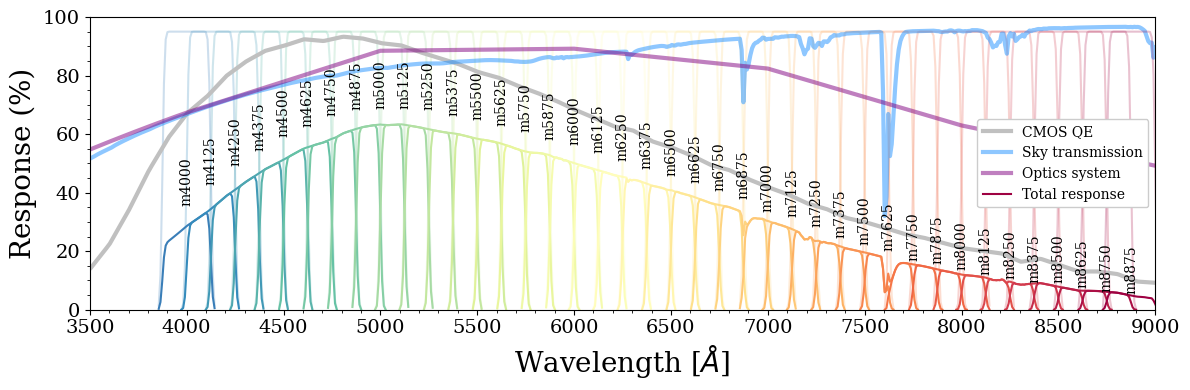

In [4]:
#	Exposure Time [s]
sdt_ris = SevenDT()
sdt_ris.echo_optics()
filterset = sdt_ris.generate_filterset(bandmin=bandmin, bandmax=bandmax, bandwidth=bandwidth, bandstep=bandstep, bandrsp=bandrsp, lammin=lammin, lammax=lammax, lamres=lamres)
T_qe = sdt_ris.get_CMOS_IMX455_QE()
sdt_ris.get_optics()
s = sdt_ris.get_sky()
sdt_ris.smooth_sky()
totrsptbl = sdt_ris.calculate_response()
Npix_ptsrc, Narcsec_ptsrc = sdt_ris.get_phot_aperture(exptime=exptime_ris, fwhm_seeing=seeing, optfactor=1.0, verbose=False)
outbl_ris = sdt_ris.get_depth_table(Nsigma=5)
sdt_ris.get_speclite()

- WFS

D             : 50.5cm
D_obscuration : 29.8cm
Deff          : 40.770cm


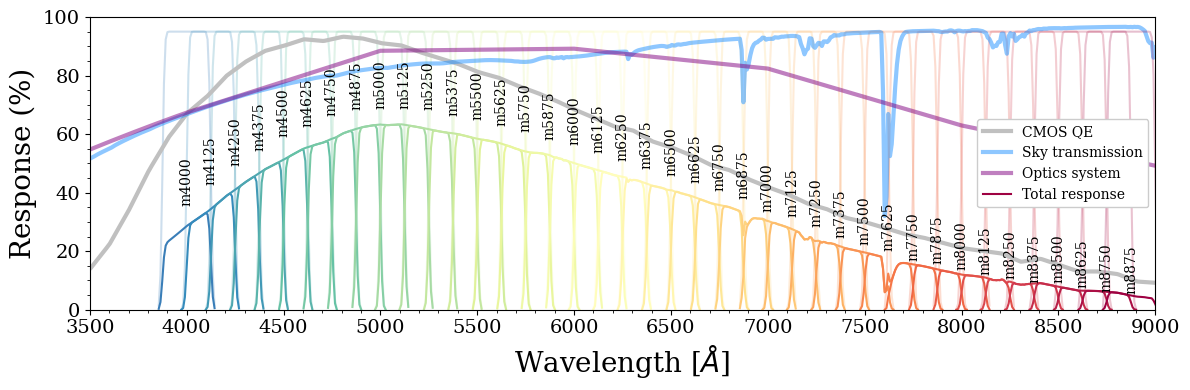

In [5]:
#	Exposure Time [s]
sdt_wfs = SevenDT()
sdt_wfs.echo_optics()
filterset = sdt_wfs.generate_filterset(bandmin=bandmin, bandmax=bandmax, bandwidth=bandwidth, bandstep=bandstep, bandrsp=bandrsp, lammin=lammin, lammax=lammax, lamres=lamres)
T_qe = sdt_wfs.get_CMOS_IMX455_QE()
sdt_wfs.get_optics()
s = sdt_wfs.get_sky()
sdt_wfs.smooth_sky()
totrsptbl = sdt_wfs.calculate_response()
Npix_ptsrc, Narcsec_ptsrc = sdt_wfs.get_phot_aperture(exptime=exptime_wfs, fwhm_seeing=seeing, optfactor=1.0, verbose=False)
outbl_wfs = sdt_wfs.get_depth_table(Nsigma=5)
sdt_wfs.get_speclite()

- IMS

D             : 50.5cm
D_obscuration : 29.8cm
Deff          : 40.770cm


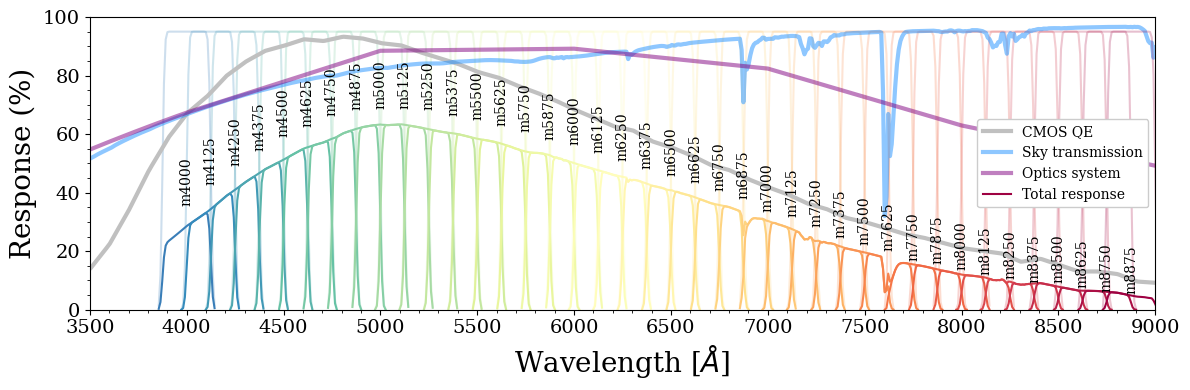

In [6]:
#	Exposure Time [s]
sdt_ims = SevenDT()
sdt_ims.echo_optics()
filterset = sdt_ims.generate_filterset(bandmin=bandmin, bandmax=bandmax, bandwidth=bandwidth, bandstep=bandstep, bandrsp=bandrsp, lammin=lammin, lammax=lammax, lamres=lamres)
T_qe = sdt_ims.get_CMOS_IMX455_QE()
sdt_ims.get_optics()
s = sdt_ims.get_sky()
sdt_ims.smooth_sky()
totrsptbl = sdt_ims.calculate_response()
Npix_ptsrc, Narcsec_ptsrc = sdt_ims.get_phot_aperture(exptime=exptime_ims, fwhm_seeing=seeing, optfactor=1.0, verbose=False)
outbl_ims = sdt_ims.get_depth_table(Nsigma=5)
sdt_ims.get_speclite()

## Result

In [7]:
path_save = '../output'

In [8]:
colors = makeSpecColors(len(outbl_ris))

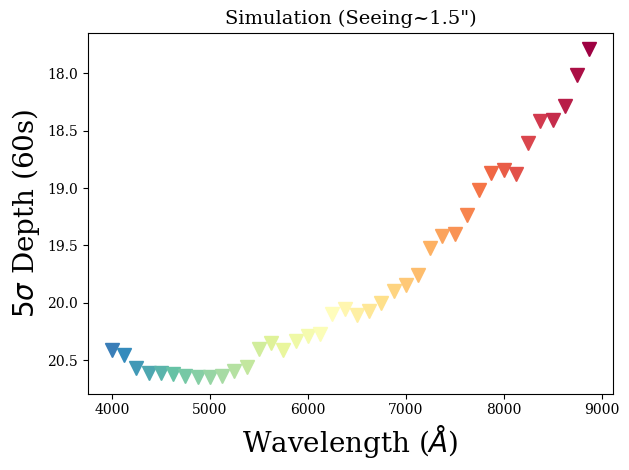

In [9]:
for ii in range(len(outbl_ris)):
	plt.plot(outbl_ris['center_wavelength'][ii], outbl_ris['5sigma_depth'][ii], 'v', color=colors[-ii-1], mec=colors[-ii-1], ms=10)

yl, yu = plt.ylim()
plt.ylim([yu, yl])
plt.ylabel(r"$5\sigma$ Depth (60s)")
plt.xlabel(r'Wavelength ($\AA$)')
plt.title(f"""Simulation (Seeing~{seeing}")""")
plt.tight_layout()
plt.savefig(f'{path_save}/RIS_filter{len(colors):g}_seeing{seeing}_optfactor_1.0.png',)
outbl_ris.write(f'{path_save}/RIS_filter{len(colors):g}_seeing{seeing}_optfactor_1.0.csv', format='csv', overwrite=True)

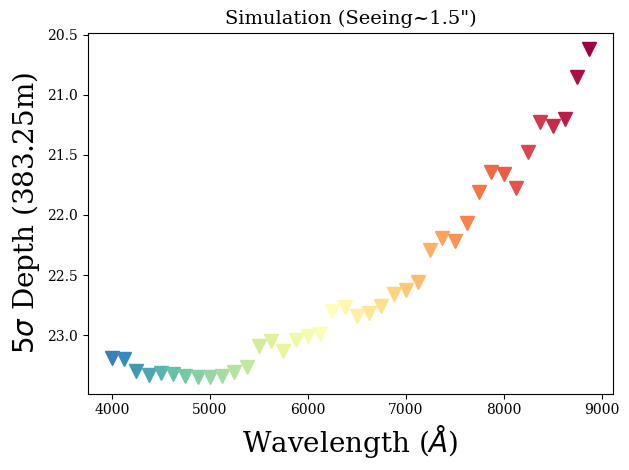

In [10]:
for ii in range(len(outbl_wfs)):
	plt.plot(outbl_wfs['center_wavelength'][ii], outbl_wfs['5sigma_depth'][ii], 'v', color=colors[-ii-1], mec=colors[-ii-1], ms=10)

yl, yu = plt.ylim()
plt.ylim([yu, yl])
plt.ylabel(f"$5\sigma$ Depth ({exptime_wfs/60:g}m)")
plt.xlabel(r'Wavelength ($\AA$)')
plt.title(f"""Simulation (Seeing~{seeing}")""")
plt.tight_layout()
plt.savefig(f'{path_save}/WFS_filter{len(colors):g}_seeing{seeing}_optfactor_1.0.png',)
outbl_wfs.write(f'{path_save}/WFS_filter{len(colors):g}_seeing{seeing}_optfactor_1.0.csv', format='csv', overwrite=True)

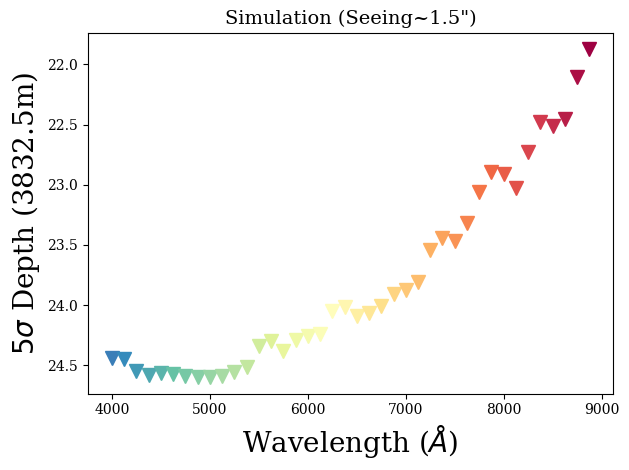

In [11]:
for ii in range(len(outbl_ims)):
	plt.plot(outbl_ims['center_wavelength'][ii], outbl_ims['5sigma_depth'][ii], 'v', color=colors[-ii-1], mec=colors[-ii-1], ms=10)

yl, yu = plt.ylim()
plt.ylim([yu, yl])
plt.ylabel(f"$5\sigma$ Depth ({exptime_ims/60:g}m)")
plt.xlabel(r'Wavelength ($\AA$)')
plt.title(f"""Simulation (Seeing~{seeing}")""")
plt.tight_layout()
plt.savefig(f'{path_save}/IMS_filter{len(colors):g}_seeing{seeing}_optfactor_1.0.png',)
outbl_ims.write(f'{path_save}/IMS_filter{len(colors):g}_seeing{seeing}_optfactor_1.0.csv', format='csv', overwrite=True)

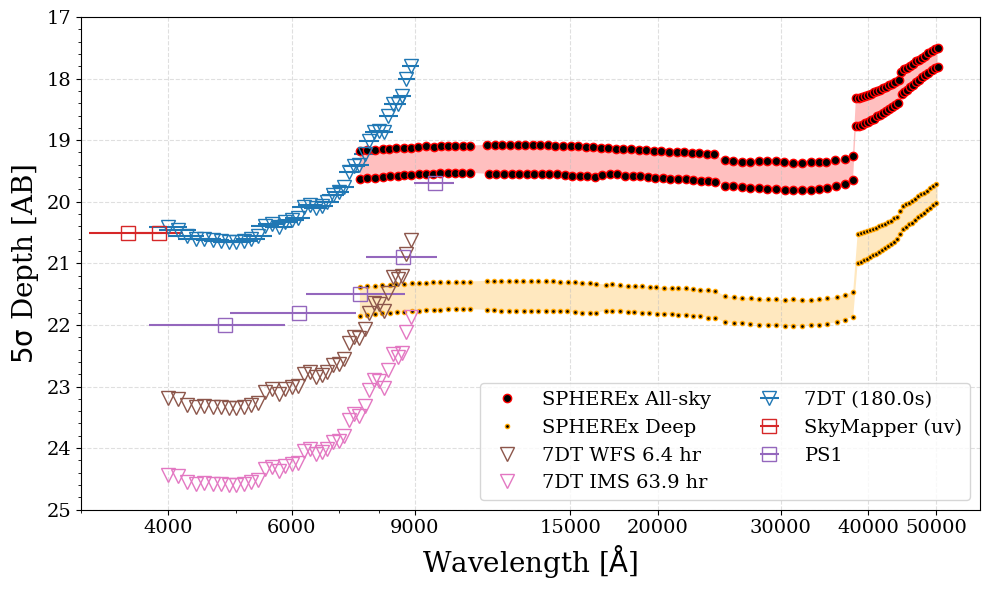

In [12]:
sdt_ris.plot_point_source_depth_comp(spherex=True, ps1=True, smss=True,)
plt.plot(outbl_wfs['center_wavelength'], outbl_wfs['5sigma_depth'], 'v', ms=10, mfc='none', label=f'7DT WFS {exptime_wfs/3600:.1f} hr')
plt.plot(outbl_ims['center_wavelength'], outbl_ims['5sigma_depth'], 'v', ms=10, mfc='none', label=f'7DT IMS {exptime_ims/3600:.1f} hr')

plt.legend(loc='lower right', ncol=2, fontsize=14)
plt.ylim([25, 17])
# plt.savefig(f'{path_save}/20231228_7DT_WFS_SPHEREx_white.png',)
plt.savefig(f'{path_save}/20231228_7DT_WFS_SPHEREx.png',)